# Delay Sweep - Conexión Simétrica Bidireccional

**Objetivo:** Estudiar cross-correlation entre dos ROIs idénticas en función del delay de transmisión.

**Características:**
- Poblaciones idénticas (Ne=800, Ni=200)
- Estímulo constante vía PoissonInput (create_population2)
- Conexión bidireccional simétrica: A⟷B con mismo peso y delay
- Barrido de delays: 0-30ms

In [1]:
# Setup
import os
import sys
from pathlib import Path

if Path.cwd().name == 'two_populations':
    os.chdir('../..')

import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
from datetime import datetime
import json
from scipy.signal import correlate, correlation_lags, welch

# Parallel execution
from joblib import Parallel, delayed
from tqdm import tqdm
import multiprocessing as mp
import warnings

from src.two_populations.model import IzhikevichNetwork
from src.two_populations.metrics import analyze_simulation_results, voltage_to_lfp, cross_correlation_analysis, power_spectrum_analysis
from src.two_populations.plots.basic_plots import plot_raster_results
from src.two_populations.plots.dashboard_plots import plot_population_dashboard, plot_connectivity_dashboard, plot_spectrogram
from src.two_populations.helpers.logger import setup_logger

from src.two_populations.plots.basic_plots import plot_raster_results, plot_voltage_traces
from src.two_populations.plots.dashboard_plots import plot_population_dashboard, plot_connectivity_dashboard, plot_spectrogram, plot_palmigiano_dashboard
from src.two_populations.metrics import palmigiano_analysis
from src.two_populations.metrics import print_network_statistics_table

from joblib import Parallel, delayed
from tqdm import tqdm
import multiprocessing as mp
import warnings
import os

from src.two_populations.helpers.validator import (
    add_validation_to_analysis, 
    plot_population_validation_dashboard, 
    print_validation_summary
)


logger = setup_logger(
    experiment_name="symmetric_delay_sweep_extended",
    console_level="INFO",
    file_level="DEBUG",
    log_to_file=False
)

logger.info(f"Working directory: {Path.cwd()}")

/home/ubuntu-deduce/Projects/izhikevich/.venv/lib/python3.10/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(
INFO       Cache size for target 'cython': 2826 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/home/ubuntu-deduce/.cython/brian_extensions' directory. [brian2]
INFO     | __main__:<module>:53 - Working directory: /home/ubuntu-deduce/Projects/izhikevich


INFO     | __main__:<module>:221 - 
INFO     | __main__:<module>:222 - REGIME: INTERMEDIATE (k=1.7, w=1.0)
INFO     | __main__:<module>:223 - ======================================================================

INFO     | __main__:<module>:244 - Delays: [0, 62.5, 125, 187.5, 250] ms | Trials: 10 | Total: 50 sims
intermediate:   0%|                                                         | 0/50 [00:00<?, ?sim/s]/home/ubuntu-deduce/Projects/izhikevich/.venv/lib/python3.10/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(
/home/ubuntu-deduce/Projects/izhikevich/.venv/lib/python3.10/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(
/home/ubuntu-deduce/Projects/izhikevich/.venv/lib/python3.10/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; fi


=== DEBUG FREQ d0 t2 ===
freq_A: 24.5Hz @ 0.214
freq_B: 14.5Hz @ 0.285
freqs range: [0.0, 1000.0]Hz
dominant_freq: 19.5Hz, period: 51.3ms

=== DEBUG FREQ d0 t1 ===
freq_A: 24.5Hz @ 0.214
freq_B: 14.5Hz @ 0.285
freqs range: [0.0, 1000.0]Hz
dominant_freq: 19.5Hz, period: 51.3ms

=== DEBUG FREQ d0 t3 ===
freq_A: 24.5Hz @ 0.214
freq_B: 14.5Hz @ 0.285
freqs range: [0.0, 1000.0]Hz
dominant_freq: 19.5Hz, period: 51.3ms

=== DEBUG FREQ d0 t8 ===
freq_A: 24.5Hz @ 0.214
freq_B: 14.5Hz @ 0.285
freqs range: [0.0, 1000.0]Hz
dominant_freq: 19.5Hz, period: 51.3ms

=== DEBUG FREQ d0 t9 ===
freq_A: 24.5Hz @ 0.214
freq_B: 14.5Hz @ 0.285
freqs range: [0.0, 1000.0]Hz
dominant_freq: 19.5Hz, period: 51.3ms

=== DEBUG FREQ d0 t6 ===
freq_A: 24.5Hz @ 0.214
freq_B: 14.5Hz @ 0.285
freqs range: [0.0, 1000.0]Hz
dominant_freq: 19.5Hz, period: 51.3ms

=== DEBUG FREQ d0 t5 ===
freq_A: 24.5Hz @ 0.214
freq_B: 14.5Hz @ 0.285
freqs range: [0.0, 1000.0]Hz
dominant_freq: 19.5Hz, period: 51.3ms

=== DEBUG FREQ d0 t7 ===
f

intermediate: 100%|████████████████████████████████████████████████| 50/50 [04:07<00:00,  4.94s/sim]
INFO     | __main__:<module>:265 - Completed: 50/50 (✓)
INFO     | __main__:<module>:272 -   0ms: XC=0.292, Lag=407.5ms
INFO     | __main__:<module>:272 -   62.5ms: XC=0.165, Lag=22.3ms
INFO     | __main__:<module>:272 -   125ms: XC=0.338, Lag=-78.4ms
INFO     | __main__:<module>:272 -   187.5ms: XC=0.210, Lag=138.9ms
INFO     | __main__:<module>:272 -   250ms: XC=0.257, Lag=131.6ms



=== DEBUG FREQ d250 t8 ===
freq_A: 18.0Hz @ 0.110
freq_B: 48.0Hz @ 0.109
freqs range: [0.0, 1000.0]Hz
dominant_freq: 33.0Hz, period: 30.3ms

=== DEBUG XC CURVES ===

Delay 0ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.351, 0.292]
  xc_mean shape: (2001,)
  Peak: lag=55.5ms, val=-0.351
  Trial 0 xc_lag_ms: 407.5ms
  Trial 0 xc_peak: 0.292

Delay 62.5ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.184, 0.165]
  xc_mean shape: (2001,)
  Peak: lag=389.5ms, val=-0.184
  Trial 0 xc_lag_ms: 22.3ms
  Trial 0 xc_peak: 0.165

Delay 125ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.273, 0.324]
  xc_mean shape: (2001,)
  Peak: lag=-130.0ms, val=0.324
  Trial 0 xc_lag_ms: 127.2ms
  Trial 0 xc_peak: 0.345

Delay 187.5ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.199, 0.189]
  xc_mean shape: (2001,)
  Peak: lag=392.0ms, val=-0.199
  Trial 0 xc_lag_ms: 445.8ms
  Trial 0 xc_peak: 0.402

Delay 250ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.240, 0.221]
  xc_m

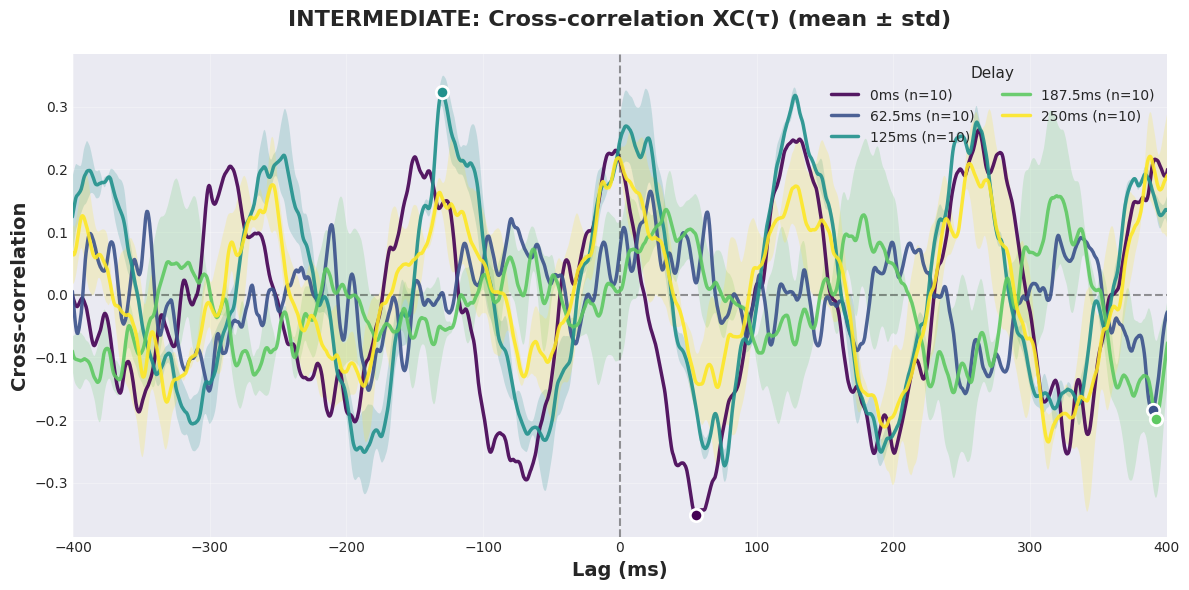

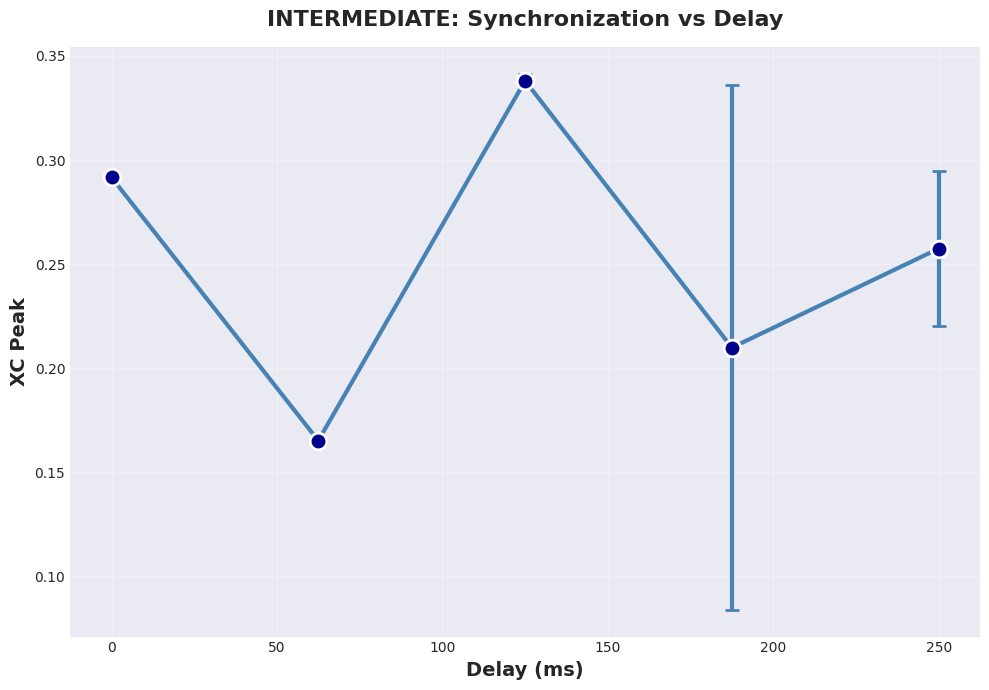

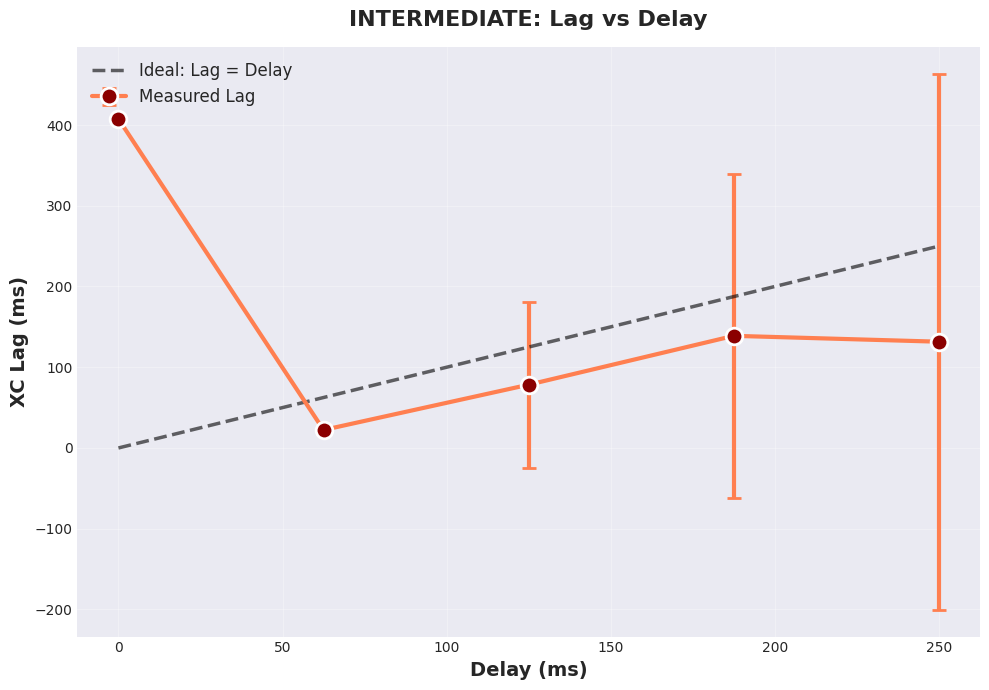

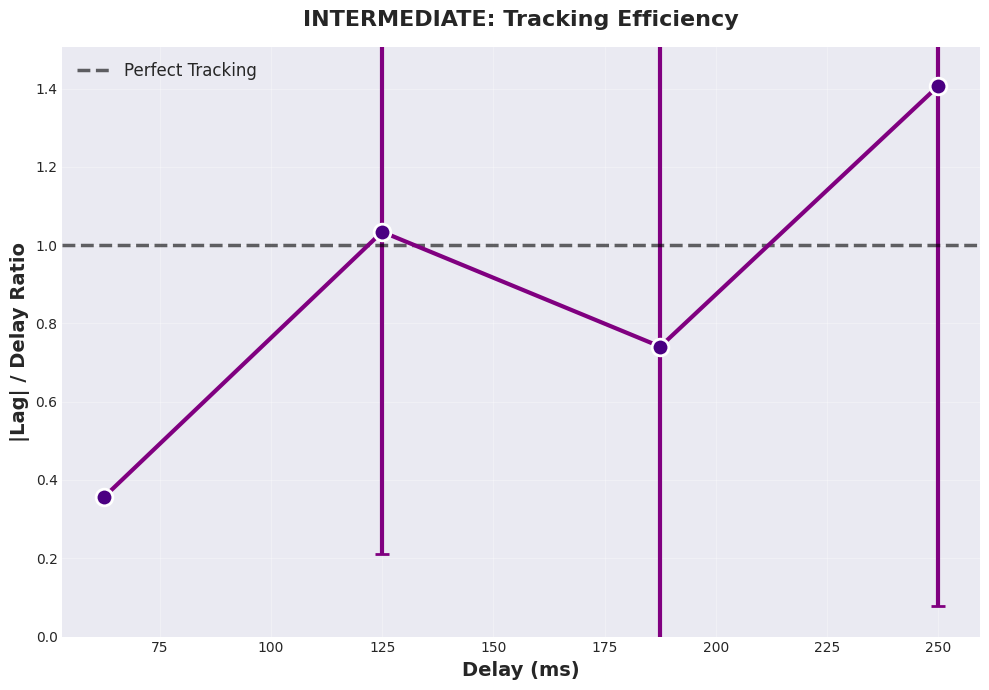

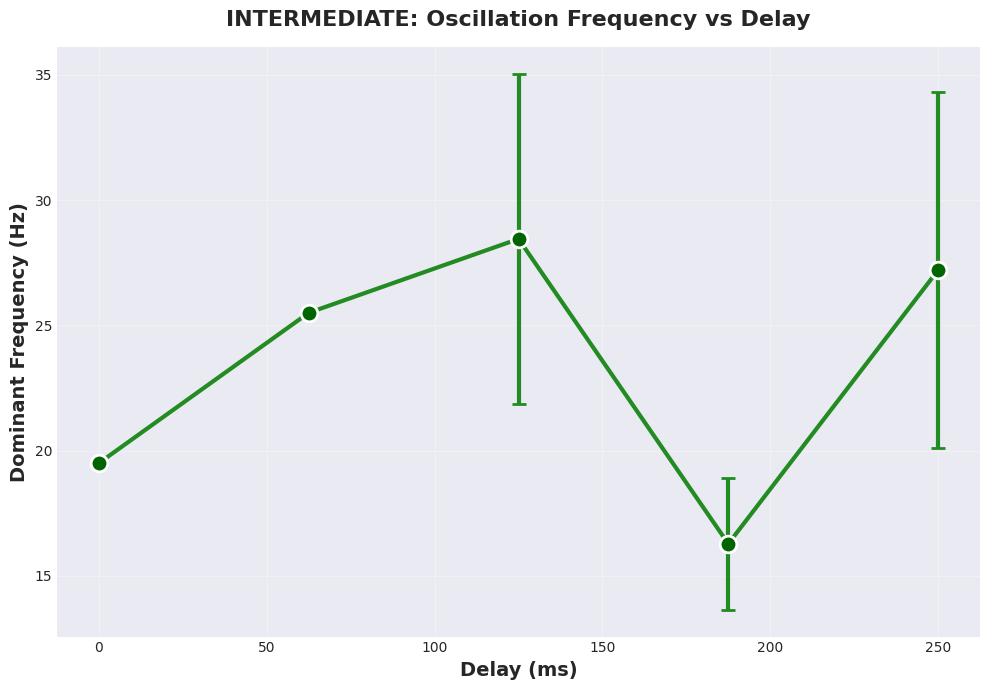

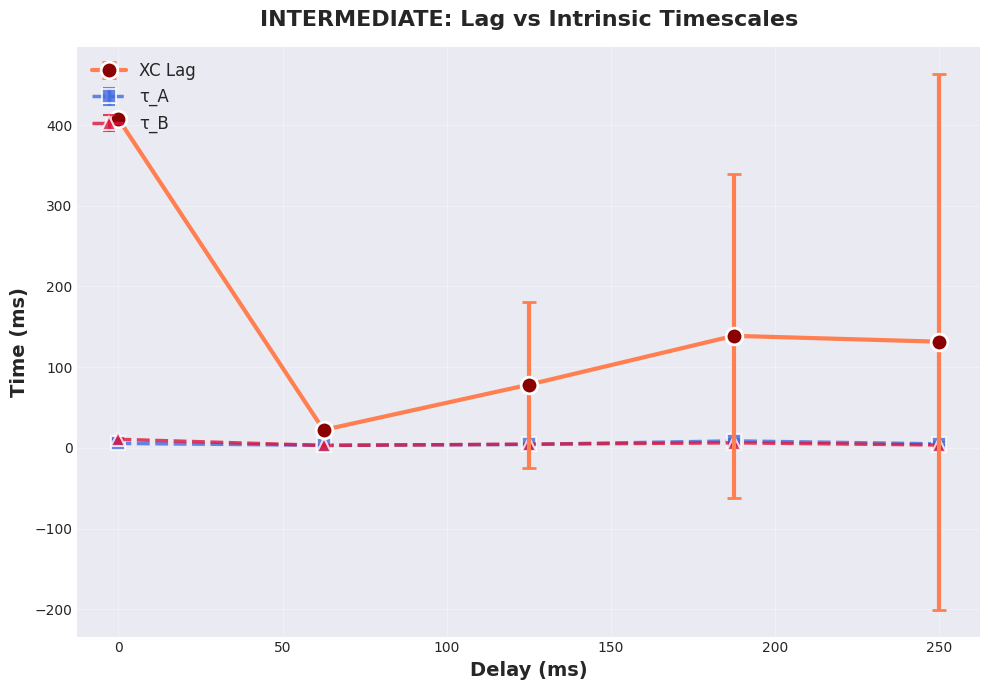

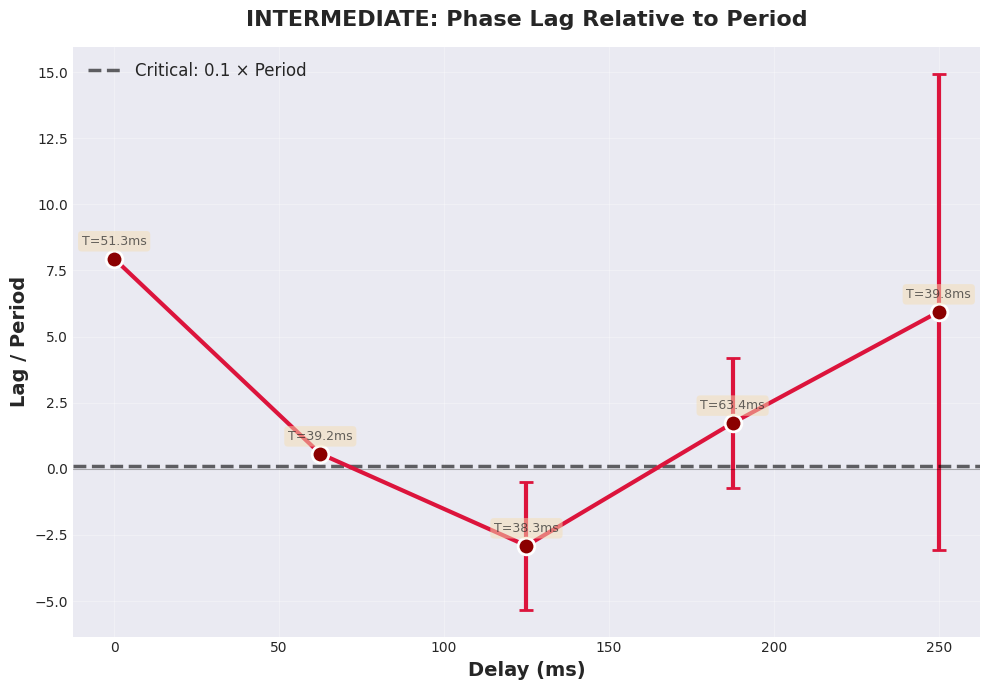

INFO     | __main__:<module>:498 - 7 plots saved in: results/experiments/symmetric_delay_sweep/intermediate/plots_20251125_151028
INFO     | __main__:<module>:526 - Results saved: results/experiments/symmetric_delay_sweep/intermediate/results_20251125_151028.json

INFO     | __main__:<module>:221 - 
INFO     | __main__:<module>:222 - REGIME: SYNCHRONOUS (k=1.7, w=2.9)
INFO     | __main__:<module>:223 - ======================================================================

INFO     | __main__:<module>:244 - Delays: [0, 62.5, 125, 187.5, 250] ms | Trials: 10 | Total: 50 sims
synchronous:   0%|                                                          | 0/50 [00:00<?, ?sim/s]


=== DEBUG FREQ d0 t9 ===
freq_A: 16.0Hz @ 4.719
freq_B: 16.0Hz @ 4.512
freqs range: [0.0, 1000.0]Hz
dominant_freq: 16.0Hz, period: 62.5ms

=== DEBUG FREQ d0 t4 ===
freq_A: 15.5Hz @ 4.451
freq_B: 15.5Hz @ 4.154
freqs range: [0.0, 1000.0]Hz
dominant_freq: 15.5Hz, period: 64.5ms

=== DEBUG FREQ d0 t5 ===
freq_A: 16.0Hz @ 4.719
freq_B: 16.0Hz @ 4.512
freqs range: [0.0, 1000.0]Hz
dominant_freq: 16.0Hz, period: 62.5ms

=== DEBUG FREQ d0 t1 ===
freq_A: 15.5Hz @ 4.451
freq_B: 15.5Hz @ 4.154
freqs range: [0.0, 1000.0]Hz
dominant_freq: 15.5Hz, period: 64.5ms

=== DEBUG FREQ d0 t6 ===
freq_A: 16.0Hz @ 4.719
freq_B: 16.0Hz @ 4.512
freqs range: [0.0, 1000.0]Hz
dominant_freq: 16.0Hz, period: 62.5ms

=== DEBUG FREQ d0 t8 ===
freq_A: 16.0Hz @ 4.719
freq_B: 16.0Hz @ 4.512
freqs range: [0.0, 1000.0]Hz
dominant_freq: 16.0Hz, period: 62.5ms

=== DEBUG FREQ d0 t2 ===
freq_A: 15.5Hz @ 4.451
freq_B: 15.5Hz @ 4.154
freqs range: [0.0, 1000.0]Hz
dominant_freq: 15.5Hz, period: 64.5ms

=== DEBUG FREQ d0 t3 ===
f

synchronous: 100%|█████████████████████████████████████████████████| 50/50 [04:09<00:00,  4.99s/sim]
INFO     | __main__:<module>:265 - Completed: 50/50 (✓)
INFO     | __main__:<module>:272 -   0ms: XC=0.914, Lag=0.3ms
INFO     | __main__:<module>:272 -   62.5ms: XC=0.913, Lag=64.4ms
INFO     | __main__:<module>:272 -   125ms: XC=0.938, Lag=25.5ms
INFO     | __main__:<module>:272 -   187.5ms: XC=0.788, Lag=0.4ms
INFO     | __main__:<module>:272 -   250ms: XC=0.922, Lag=0.8ms



=== DEBUG FREQ d250 t5 ===
freq_A: 16.0Hz @ 5.266
freq_B: 16.0Hz @ 4.710
freqs range: [0.0, 1000.0]Hz
dominant_freq: 16.0Hz, period: 62.5ms

=== DEBUG FREQ d250 t8 ===
freq_A: 16.0Hz @ 5.266
freq_B: 16.0Hz @ 4.710
freqs range: [0.0, 1000.0]Hz
dominant_freq: 16.0Hz, period: 62.5ms

=== DEBUG FREQ d250 t9 ===
freq_A: 16.0Hz @ 4.801
freq_B: 16.0Hz @ 4.584
freqs range: [0.0, 1000.0]Hz
dominant_freq: 16.0Hz, period: 62.5ms

=== DEBUG XC CURVES ===

Delay 0ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.455, 0.914]
  xc_mean shape: (2001,)
  Peak: lag=0.0ms, val=0.914
  Trial 0 xc_lag_ms: 0.0ms
  Trial 0 xc_peak: 0.920

Delay 62.5ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.463, 0.912]
  xc_mean shape: (2001,)
  Peak: lag=64.5ms, val=0.912
  Trial 0 xc_lag_ms: 64.8ms
  Trial 0 xc_peak: 0.922

Delay 125ms:
  lags range: [-500.0, 500.0]
  xc_mean range: [-0.443, 0.933]
  xc_mean shape: (2001,)
  Peak: lag=127.0ms, val=0.933
  Trial 0 xc_lag_ms: 126.8ms
  Trial 0 xc_peak: 0.93

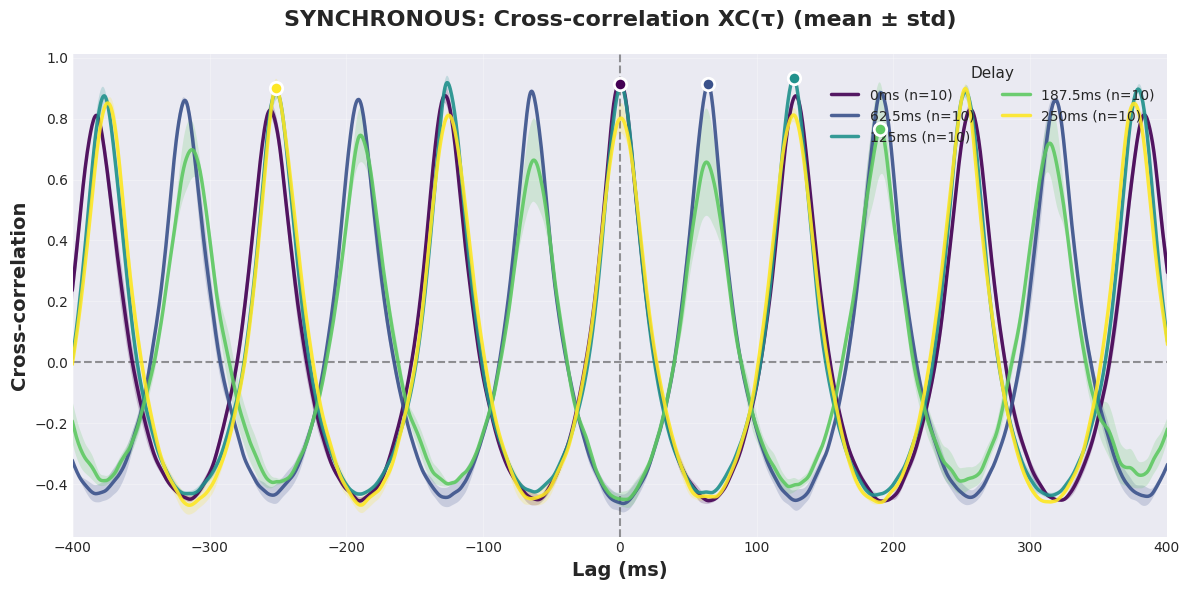

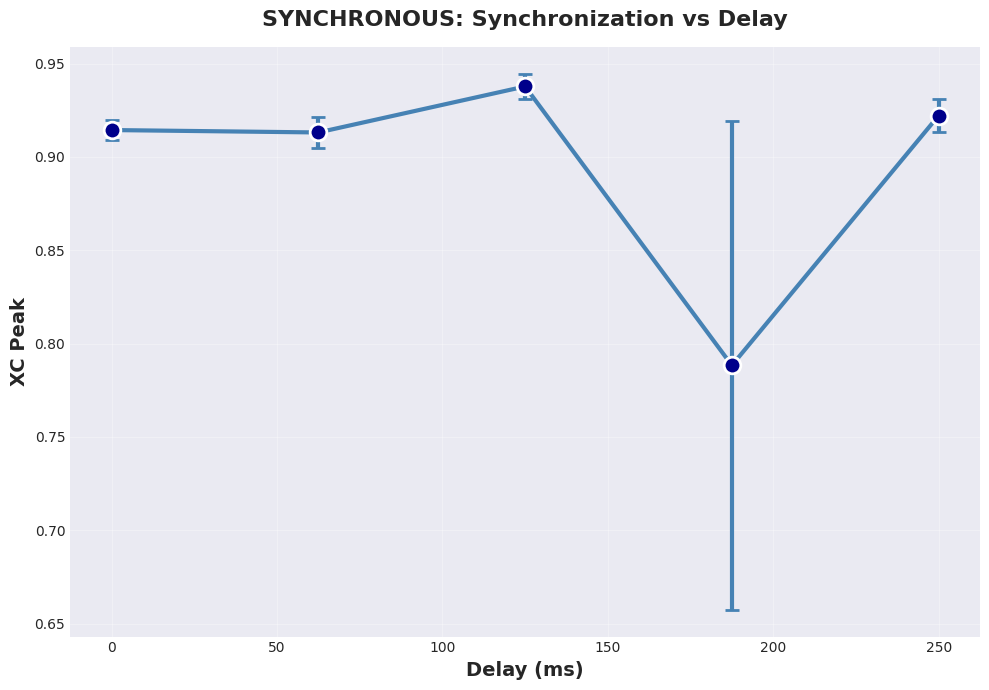

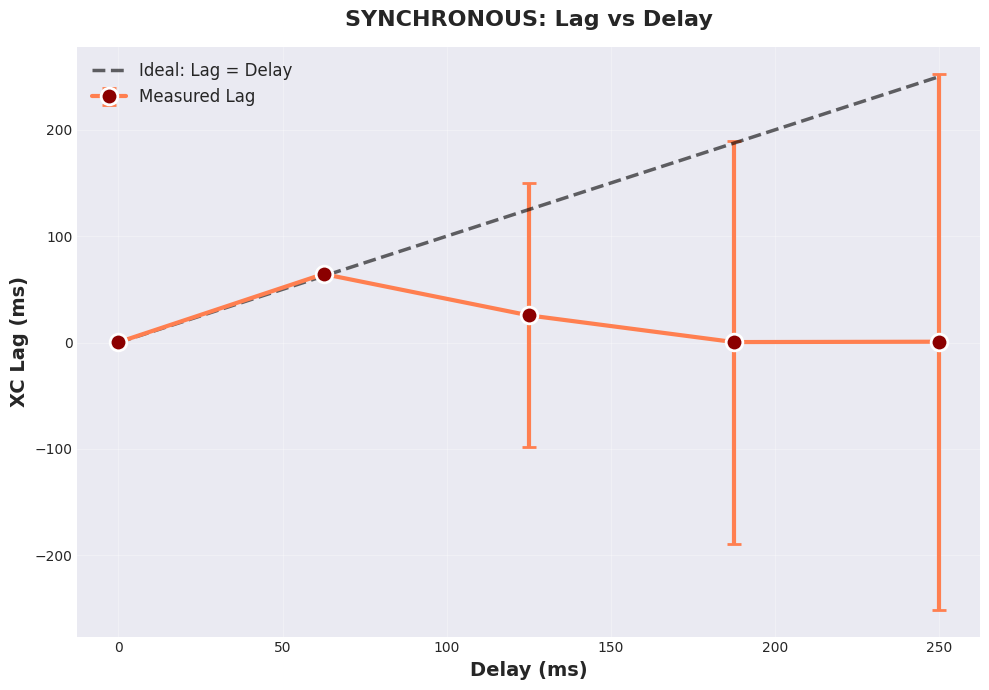

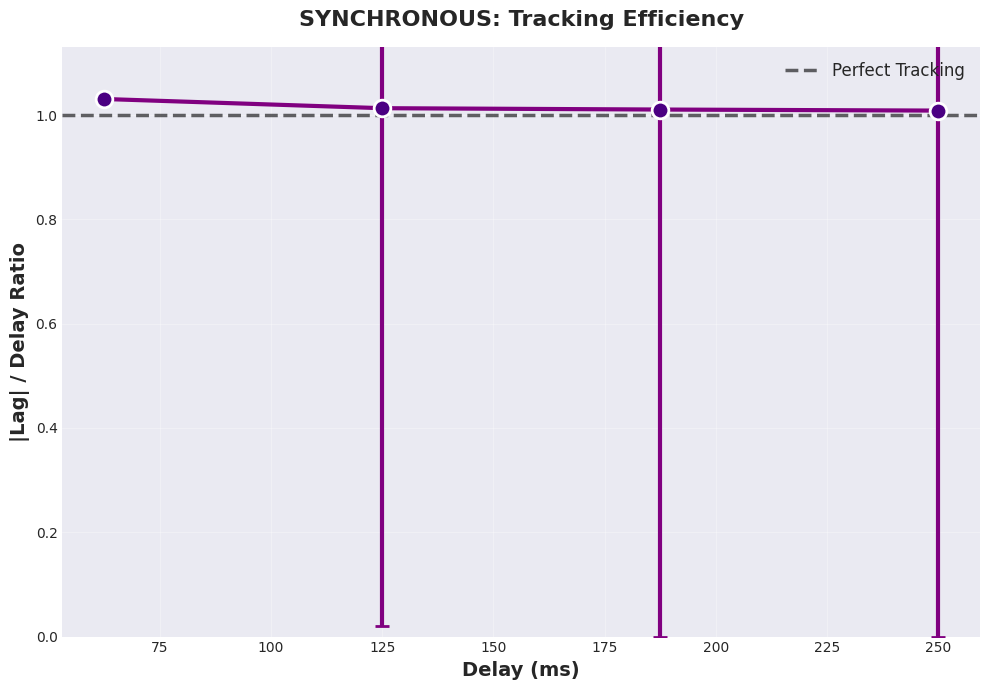

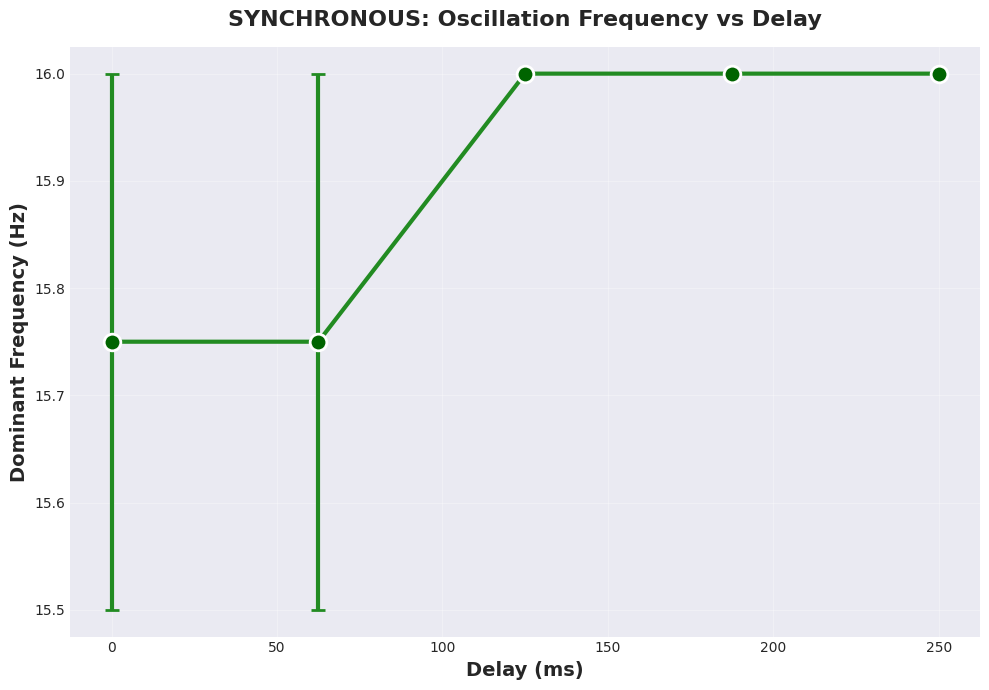

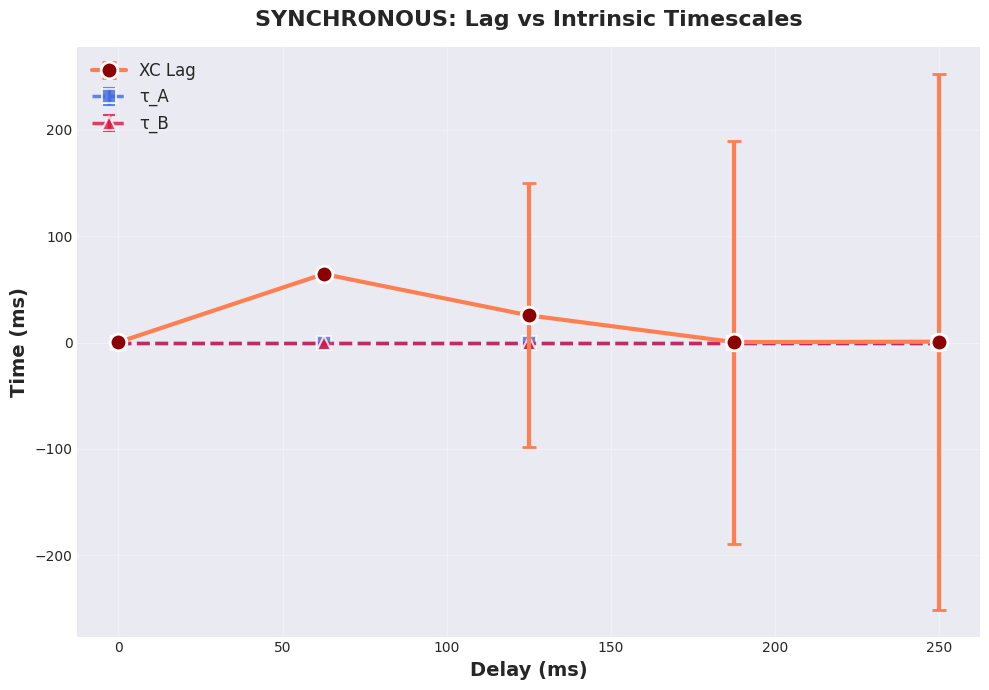

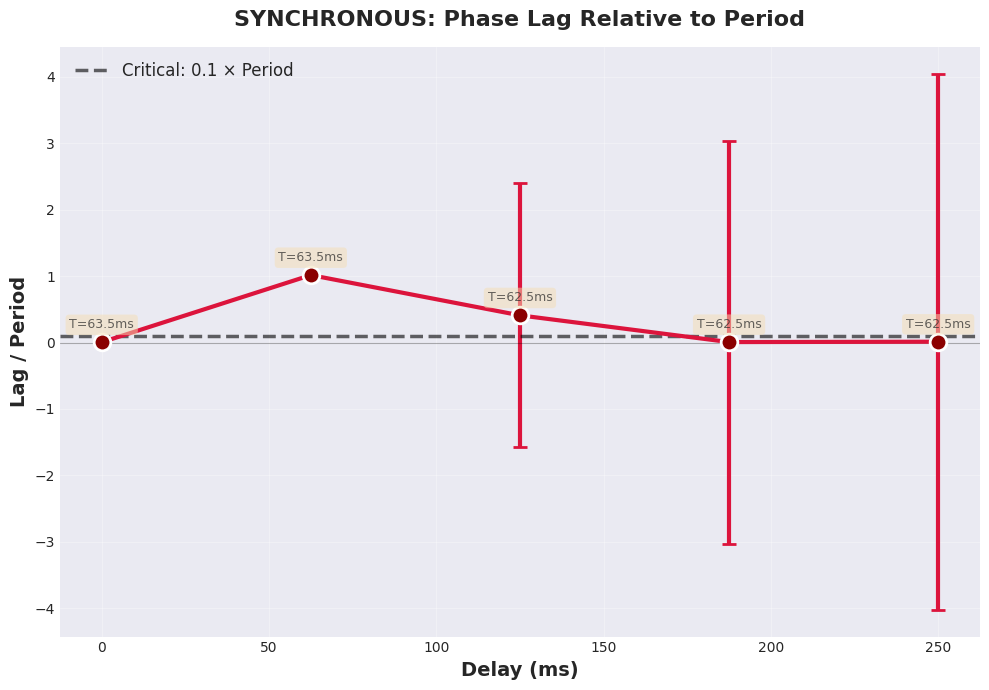

INFO     | __main__:<module>:498 - 7 plots saved in: results/experiments/symmetric_delay_sweep/synchronous/plots_20251125_151440
INFO     | __main__:<module>:526 - Results saved: results/experiments/symmetric_delay_sweep/synchronous/results_20251125_151440.json

INFO     | __main__:<module>:528 - 
INFO     | __main__:<module>:529 - ALL REGIMES COMPLETE
INFO     | __main__:<module>:530 - ======================================================================


In [2]:
# =============================================================================
# BARRIDO PARALELO CON MÚLTIPLES REGÍMENES
# =============================================================================

from src.two_populations.plots.basic_plots import plot_raster_results, plot_voltage_traces
from src.two_populations.plots.dashboard_plots import plot_population_dashboard, plot_connectivity_dashboard, plot_spectrogram, plot_palmigiano_dashboard
from src.two_populations.metrics import palmigiano_analysis, print_network_statistics_table
from src.two_populations.helpers.validator import add_validation_to_analysis, plot_population_validation_dashboard, print_validation_summary

from joblib import Parallel, delayed
from tqdm import tqdm
import multiprocessing as mp
import warnings
import os
import pickle

# =============================================================================
# FUNCIÓN DE SIMULACIÓN INDIVIDUAL (ACTUALIZADA)
# =============================================================================

def run_single_simulation_parallel(delay_ms, trial_idx, regime_name):
    """Versión limpia para paralelización"""
    warnings.filterwarnings('ignore')
    os.environ['PYTHONWARNINGS'] = 'ignore'
    
    import logging
    logging.getLogger('brian2').setLevel(logging.ERROR)
    
    from src.two_populations.helpers.logger import setup_logger
    worker_logger = setup_logger("worker", console_level="ERROR", file_level="ERROR", log_to_file=False)
    
    try:
        start_scope()
        
        network = IzhikevichNetwork(
            dt_val=SIM_CONFIG['dt_ms'],
            T_total=SIM_CONFIG['T_ms'],
            fixed_seed=SIM_CONFIG['fixed_seed'],
            variable_seed=SIM_CONFIG['variable_seed_base'],
            trial=trial_idx
        )
        
        pop_A = network.create_population2('A', **POPULATION_PARAMS)
        pop_B = network.create_population2('B', **POPULATION_PARAMS)
        
        syn_AB = network.connect_populations('A', 'B', 
            p_inter=CONNECTION_PARAMS['p_inter'],
            weight_scale=CONNECTION_PARAMS['weight_scale'],
            delay_value=delay_ms)
        
        syn_BA = network.connect_populations('B', 'A',
            p_inter=CONNECTION_PARAMS['p_inter'],
            weight_scale=CONNECTION_PARAMS['weight_scale'],
            delay_value=delay_ms)
        
        if syn_AB is None or syn_BA is None:
            return (False, None, f"No connections for delay={delay_ms}ms")
        
        network.setup_monitors(['A', 'B'], record_v_dt=0.5, sample_fraction=1.0)
        results = network.run_simulation()
        
        conn = analyze_simulation_results(
            results['A']['spike_monitor'], results['B']['spike_monitor'], 1000,
            f"{regime_name}_d{delay_ms}_t{trial_idx}",
            warmup=SIM_CONFIG['warmup_ms'],
            state_monitors={'A': network.monitors['A'], 'B': network.monitors['B']},
            delays={'AB': np.array(results['delays_AB']), 'BA': np.array(results['delays_BA'])},
            signal_mode='lfp'
        )
        
        if conn is None:
            return (False, None, f"Analysis failed for delay={delay_ms}ms")
        
        # PLOTS (trial 0)
        if trial_idx == 0:
            plot_dir = Path(f"./results/experiments/symmetric_delay_sweep/{regime_name}/plots/delay_{delay_ms}ms")
            plot_dir.mkdir(parents=True, exist_ok=True)
            
            results_dict = {f"{regime_name}_d{delay_ms}": conn}
            
            try:
                fig = plot_raster_results(results, N_exc=800, N_total=1000, warmup_ms=500)
                if fig: 
                    fig.savefig(plot_dir / 'raster.png', dpi=150, bbox_inches='tight')
                    plt.close(fig)
            except: pass
            
            try:
                fig = plot_population_dashboard(results_dict)
                if fig:
                    fig.savefig(plot_dir / 'population.png', dpi=150, bbox_inches='tight')
                    plt.close(fig)
            except: pass
            
            try:
                fig = plot_connectivity_dashboard(results_dict)
                if fig:
                    fig.savefig(plot_dir / 'connectivity.png', dpi=150, bbox_inches='tight')
                    plt.close(fig)
            except: pass
            
            try:
                fig = plot_spectrogram(results_dict)
                if fig:
                    fig.savefig(plot_dir / 'spectrogram.png', dpi=150, bbox_inches='tight')
                    plt.close(fig)
            except: pass
            
            try:
                validation_results = add_validation_to_analysis(results_dict)
                print_validation_summary(validation_results)
                fig = plot_population_validation_dashboard(validation_results)
                if fig:
                    fig.savefig(plot_dir / 'validation.png', dpi=150, bbox_inches='tight')
                    plt.close(fig)
            except: pass
            
            try:
                metrics_palmi, lfp_A, lfp_B, fs = palmigiano_analysis(results, start_ms=500)
                fig = plot_palmigiano_dashboard(metrics_palmi, lfp_A, lfp_B, fs=1000/results['dt'])
                if fig:
                    fig.savefig(plot_dir / 'palmigiano.png', dpi=150, bbox_inches='tight')
                    plt.close(fig)
            except: pass
            
            plt.close('all')
    
        xc_full = conn['cross_correlation']['correlation']
        lags_full = conn['cross_correlation']['lags']
        xc_peak = abs(conn['cross_correlation']['peak_value'])
        xc_lag_ms = conn['cross_correlation']['peak_lag']

        psd_A = conn['power_A']['psd']
        psd_B = conn['power_B']['psd']
        freqs = conn['power_A']['freqs']
        peak_freq_A = conn['power_A']['peak_freq']
        peak_freq_B = conn['power_B']['peak_freq']

        freq_mask = (freqs >= 10) & (freqs <= 50)
        psd_A_filt = psd_A.copy()
        psd_A_filt[~freq_mask] = 0
        psd_B_filt = psd_B.copy()
        psd_B_filt[~freq_mask] = 0

        peak_freq_A = freqs[np.argmax(psd_A_filt)]
        peak_freq_B = freqs[np.argmax(psd_B_filt)]

        dominant_freq = (peak_freq_A + peak_freq_B) / 2
        period_ms = 1000.0 / dominant_freq if dominant_freq > 0 else np.nan

        tau_A_ms = conn.get('tau_A', 0)
        tau_B_ms = conn.get('tau_B', 0)
        
                # Después de línea ~145 (antes de metrics):
        print(f"\n=== DEBUG FREQ d{delay_ms} t{trial_idx} ===")
        print(f"freq_A: {peak_freq_A:.1f}Hz @ {psd_A[np.argmax(psd_A)]:.3f}")
        print(f"freq_B: {peak_freq_B:.1f}Hz @ {psd_B[np.argmax(psd_B)]:.3f}")
        print(f"freqs range: [{freqs.min():.1f}, {freqs.max():.1f}]Hz")
        print(f"dominant_freq: {dominant_freq:.1f}Hz, period: {period_ms:.1f}ms")

        metrics = {
            'delay_ms': delay_ms,
            'trial': trial_idx,
            'xc_peak': xc_peak,
            'xc_lag_ms': xc_lag_ms,
            'plv_alpha': conn['phase_locking']['alpha']['plv'],
            'pli_alpha': conn['phase_locking']['alpha']['pli'],
            'coh_peak': conn['coherence']['peak_coherence'],
            'coh_freq': conn['coherence']['peak_freq'],
            'tau_A_ms': tau_A_ms,
            'tau_B_ms': tau_B_ms,
            'peak_freq_A': peak_freq_A,
            'peak_freq_B': peak_freq_B,
            'dominant_freq': dominant_freq,
            'period_ms': period_ms,
            'lag_delay_ratio': xc_lag_ms / delay_ms if delay_ms > 0 else np.nan,
            'lag_period_ratio': xc_lag_ms / period_ms if not np.isnan(period_ms) else np.nan,
            'lag_tau_ratio_A': xc_lag_ms / tau_A_ms if tau_A_ms > 0 else np.nan,
            'lag_tau_ratio_B': xc_lag_ms / tau_B_ms if tau_B_ms > 0 else np.nan,
            'xc_full': xc_full.tolist(),
            'lags_full': lags_full.tolist(),
            'psd_A': psd_A.tolist(),
            'psd_B': psd_B.tolist(),
            'freqs': freqs.tolist()
        }
        
        del network, pop_A, pop_B, syn_AB, syn_BA, results, conn
        plt.close('all')
        
        return (True, metrics, None)
        
    except Exception as e:
        import traceback
        return (False, None, f"delay={delay_ms}ms trial={trial_idx}: {str(e)}")


# =============================================================================
# LOOP SOBRE REGÍMENES
# =============================================================================

REGIME_POINTS = {
    # 'asynchronous': {'k_exc':1.7, 'weight_scale': 0.4},
    'intermediate': {'k_exc':1.7, 'weight_scale': 1.0},
    'synchronous': {'k_exc': 1.7, 'weight_scale': 2.9}
}
 
DELAY_VALUES = [0,62.5,125,187.5,250]

SIM_CONFIG = {
    'dt_ms': 0.1,
    'T_ms': 2500,
    'warmup_ms': 500,
    'n_trials': 10,
    'fixed_seed': 100,
    'variable_seed_base': 200
}

all_results_by_regime = {}

for regime_name, params in REGIME_POINTS.items():
    logger.info(f"\n{'='*70}")
    logger.info(f"REGIME: {regime_name.upper()} (k={params['k_exc']}, w={params['weight_scale']})")
    logger.info(f"{'='*70}\n")
    
    POPULATION_PARAMS = {
        'Ne': 800, 'Ni': 200,
        'k_exc': params['k_exc'],
        'k_inh': params['k_exc'] * 3.9,
        'noise_exc': 0.88, 'noise_inh': 0.6,
        'p_intra': 0.1, 'delay': 0.0,
        'rate_hz': 10.0,
        'stim_start_ms': None, 'stim_duration_ms': None,
        'stim_base': 1.0, 'stim_elevated': None
    }
    
    CONNECTION_PARAMS = {
        'p_inter': 0.02,
        'weight_scale': params['weight_scale']
    }
    
    jobs = [(delay, trial) for delay in DELAY_VALUES for trial in range(SIM_CONFIG['n_trials'])]
    total_sims = len(jobs)
    
    logger.info(f"Delays: {DELAY_VALUES} ms | Trials: {SIM_CONFIG['n_trials']} | Total: {total_sims} sims")
    
    warnings.filterwarnings('ignore')
    
    with tqdm(total=total_sims, desc=f"{regime_name}", ncols=100, unit="sim", colour='green') as pbar:
        results = Parallel(n_jobs=-2, backend='loky', verbose=0)(
            delayed(run_single_simulation_parallel)(delay, trial, regime_name) for delay, trial in jobs
        )
        pbar.update(total_sims)
    
    all_results = []
    failed_jobs = []
    
    for (delay, trial), (success, data, error) in zip(jobs, results):
        if success:
            all_results.append(data)
        else:
            failed_jobs.append((delay, trial, error))
    
    all_results_by_regime[regime_name] = all_results
    
    logger.info(f"Completed: {len(all_results)}/{total_sims} ({'✓' if not failed_jobs else '⚠️'})")
    
    for delay in DELAY_VALUES:
        delay_res = [r for r in all_results if r['delay_ms'] == delay]
        if delay_res:
            xc_m = np.mean([r['xc_peak'] for r in delay_res])
            lag_m = np.mean([r['xc_lag_ms'] for r in delay_res])
            logger.info(f"  {delay}ms: XC={xc_m:.3f}, Lag={lag_m:.1f}ms")
    
    # =============================================================================
    # ANÁLISIS Y PLOTS POR RÉGIMEN
    # =============================================================================
    
    if len(all_results) == 0:
        logger.warning(f"No successful simulations for {regime_name}")
        continue
    
    def aggregate_by_delay(all_results, delay_values):
        aggregated = {}
        for delay in delay_values:
            trials = [r for r in all_results if r['delay_ms'] == delay]
            if not trials:
                continue
            
            xc_stack = np.array([t['xc_full'] for t in trials])
            lags = np.array(trials[0]['lags_full'])
            
            aggregated[delay] = {
                'n_trials': len(trials),
                'lags': lags,
                'xc_mean': xc_stack.mean(axis=0),
                'xc_std': xc_stack.std(axis=0),
                'xc_peak_mean': np.mean([t['xc_peak'] for t in trials]),
                'xc_peak_std': np.std([t['xc_peak'] for t in trials]),
                'xc_lag_mean': np.mean([t['xc_lag_ms'] for t in trials]),
                'xc_lag_std': np.std([t['xc_lag_ms'] for t in trials]),
                'plv_alpha_mean': np.mean([t['plv_alpha'] for t in trials]),
                'plv_alpha_std': np.std([t['plv_alpha'] for t in trials]),
                'lag_delay_ratio_mean': np.mean([abs(t['lag_delay_ratio']) for t in trials if not np.isnan(t['lag_delay_ratio'])]),
                'lag_delay_ratio_std': np.std([t['lag_delay_ratio'] for t in trials if not np.isnan(t['lag_delay_ratio'])]),
                'freq_mean': np.mean([t['dominant_freq'] for t in trials]),
                'freq_std': np.std([t['dominant_freq'] for t in trials]),
                'period_mean': np.mean([t['period_ms'] for t in trials]),
                'period_std': np.std([t['period_ms'] for t in trials]),
                'lag_period_ratio_mean': np.mean([t['lag_period_ratio'] for t in trials]),
                'lag_period_ratio_std': np.std([t['lag_period_ratio'] for t in trials]),
                'tau_A_mean': np.mean([t['tau_A_ms'] for t in trials]),
                'tau_A_std': np.std([t['tau_A_ms'] for t in trials]),
                'tau_B_mean': np.mean([t['tau_B_ms'] for t in trials]),
                'tau_B_std': np.std([t['tau_B_ms'] for t in trials]),
            }
        return aggregated
    
    agg_data = aggregate_by_delay(all_results, DELAY_VALUES)
    
    output_dir = Path(f"./results/experiments/symmetric_delay_sweep/{regime_name}")
    output_dir.mkdir(parents=True, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plots_dir = output_dir / f"plots_{timestamp}"
    plots_dir.mkdir(exist_ok=True)
    
    plt.style.use('seaborn-v0_8-darkgrid')
    COLORS = plt.cm.viridis(np.linspace(0, 1, len(DELAY_VALUES)))
    
    # Insertar ANTES del plot 1, después de aggregate_by_delay:

    print("\n=== DEBUG XC CURVES ===")
    for delay in sorted(agg_data.keys()):
        data = agg_data[delay]
        print(f"\nDelay {delay}ms:")
        print(f"  lags range: [{data['lags'].min():.1f}, {data['lags'].max():.1f}]")
        print(f"  xc_mean range: [{data['xc_mean'].min():.3f}, {data['xc_mean'].max():.3f}]")
        print(f"  xc_mean shape: {data['xc_mean'].shape}")
        
        # Peak detection
        peak_idx = np.argmax(np.abs(data['xc_mean']))
        peak_lag = data['lags'][peak_idx]
        peak_val = data['xc_mean'][peak_idx]
        print(f"  Peak: lag={peak_lag:.1f}ms, val={peak_val:.3f}")
        
        # Comparar con trial individual
        trial_0 = [t for t in all_results if t['delay_ms'] == delay][0]
        print(f"  Trial 0 xc_lag_ms: {trial_0['xc_lag_ms']:.1f}ms")
        print(f"  Trial 0 xc_peak: {trial_0['xc_peak']:.3f}")
        
    # 1. XC CURVES
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, delay in enumerate(sorted(agg_data.keys())):
        data = agg_data[delay]
        color = COLORS[i]
        ax.plot(data['lags'], data['xc_mean'], linewidth=2.5, label=f"{delay}ms (n={data['n_trials']})", 
                color=color, alpha=0.9, zorder=5)
        ax.fill_between(data['lags'], data['xc_mean'] - data['xc_std'], data['xc_mean'] + data['xc_std'], 
                         color=color, alpha=0.2, edgecolor='none', zorder=1)
        peak_idx = np.argmax(np.abs(data['xc_mean']))
        ax.scatter(data['lags'][peak_idx], data['xc_mean'][peak_idx], s=80, 
                   color=color, edgecolor='white', linewidth=2, zorder=10, marker='o')
    ax.set_xlim(-400, 400)
    ax.axhline(0, color='black', linestyle='--', alpha=0.4, linewidth=1.5)
    ax.axvline(0, color='black', linestyle='--', alpha=0.4, linewidth=1.5)
    ax.set_xlabel('Lag (ms)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Cross-correlation', fontsize=14, fontweight='bold')
    ax.set_title(f'{regime_name.upper()}: Cross-correlation XC(τ) (mean ± std)', fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='upper right', framealpha=0.95, fontsize=10, title='Delay', title_fontsize=11, ncol=2)
    ax.grid(True, alpha=0.3, linewidth=0.8)
    plt.tight_layout()
    plt.show()
    fig.savefig(plots_dir / "1_xc_curves.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # 2-7: Plots restantes (XC peak, Lag vs Delay, Tracking, Freq, Timescales, Phase)
    delays_plot = sorted(agg_data.keys())
    
    # 2. XC PEAK vs DELAY
    fig, ax = plt.subplots(figsize=(10, 7))
    peaks_mean = [agg_data[d]['xc_peak_mean'] for d in delays_plot]
    peaks_std = [agg_data[d]['xc_peak_std'] for d in delays_plot]
    ax.errorbar(delays_plot, peaks_mean, yerr=peaks_std, fmt='o-', linewidth=3, markersize=12, capsize=5, 
                capthick=2, color='steelblue', markerfacecolor='darkblue', markeredgecolor='white', 
                markeredgewidth=2, ecolor='steelblue')
    ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
    ax.set_ylabel('XC Peak', fontsize=14, fontweight='bold')
    ax.set_title(f'{regime_name.upper()}: Synchronization vs Delay', fontsize=16, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    fig.savefig(plots_dir / "2_xc_peak_vs_delay.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # 3. LAG vs DELAY
    fig, ax = plt.subplots(figsize=(10, 7))
    lags_mean = [abs(agg_data[d]['xc_lag_mean']) for d in delays_plot]
    lags_std = [agg_data[d]['xc_lag_std'] for d in delays_plot]
    ax.errorbar(delays_plot, lags_mean, yerr=lags_std, fmt='o-', linewidth=3, markersize=12, capsize=5,
                capthick=2, color='coral', markerfacecolor='darkred', markeredgecolor='white', 
                markeredgewidth=2, ecolor='coral', label='Measured Lag')
    ax.plot(delays_plot, delays_plot, 'k--', alpha=0.6, linewidth=2.5, label='Ideal: Lag = Delay')
    ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
    ax.set_ylabel('XC Lag (ms)', fontsize=14, fontweight='bold')
    ax.set_title(f'{regime_name.upper()}: Lag vs Delay', fontsize=16, fontweight='bold', pad=15)
    ax.legend(fontsize=12, framealpha=0.95)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    fig.savefig(plots_dir / "3_lag_vs_delay.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # 4. TRACKING EFFICIENCY
    fig, ax = plt.subplots(figsize=(10, 7))
    delays_nonzero = [d for d in delays_plot if d > 0]
    if delays_nonzero:
        ratios_mean = [agg_data[d]['lag_delay_ratio_mean'] for d in delays_nonzero]
        ratios_std = [agg_data[d]['lag_delay_ratio_std'] for d in delays_nonzero]
        ax.errorbar(delays_nonzero, ratios_mean, yerr=ratios_std, fmt='o-', linewidth=3, markersize=12,
                    capsize=5, capthick=2, color='purple', markerfacecolor='indigo', markeredgecolor='white',
                    markeredgewidth=2, ecolor='purple')
        ax.axhline(1.0, color='black', linestyle='--', alpha=0.6, linewidth=2.5, label='Perfect Tracking')
        ax.set_ylim(0, max(1.1, max(ratios_mean) + 0.1))
    ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
    ax.set_ylabel('|Lag| / Delay Ratio', fontsize=14, fontweight='bold')
    ax.set_title(f'{regime_name.upper()}: Tracking Efficiency', fontsize=16, fontweight='bold', pad=15)
    ax.legend(fontsize=12, framealpha=0.95)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    fig.savefig(plots_dir / "4_tracking_efficiency.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # 5. FREQUENCY vs DELAY
    fig, ax = plt.subplots(figsize=(10, 7))
    freqs_mean = [agg_data[d]['freq_mean'] for d in delays_plot]
    freqs_std = [agg_data[d]['freq_std'] for d in delays_plot]
    ax.errorbar(delays_plot, freqs_mean, yerr=freqs_std, fmt='o-', linewidth=3, markersize=12, capsize=5,
                capthick=2, color='forestgreen', markerfacecolor='darkgreen', markeredgecolor='white',
                markeredgewidth=2, ecolor='forestgreen')
    ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Dominant Frequency (Hz)', fontsize=14, fontweight='bold')
    ax.set_title(f'{regime_name.upper()}: Oscillation Frequency vs Delay', fontsize=16, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    fig.savefig(plots_dir / "5_frequency_vs_delay.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # 6. LAG vs TIMESCALES
    fig, ax = plt.subplots(figsize=(10, 7))
    tau_A_mean = [agg_data[d]['tau_A_mean'] for d in delays_plot]
    tau_A_std = [agg_data[d]['tau_A_std'] for d in delays_plot]
    tau_B_mean = [agg_data[d]['tau_B_mean'] for d in delays_plot]
    tau_B_std = [agg_data[d]['tau_B_std'] for d in delays_plot]
    ax.errorbar(delays_plot, lags_mean, yerr=lags_std, fmt='o-', linewidth=3, markersize=12, capsize=5,
                capthick=2, label='XC Lag', color='coral', markerfacecolor='darkred', markeredgecolor='white',
                markeredgewidth=2, ecolor='coral', zorder=3)
    ax.errorbar(delays_plot, tau_A_mean, yerr=tau_A_std, fmt='s--', linewidth=2.5, markersize=10, capsize=4,
                capthick=1.5, label='τ_A', color='royalblue', alpha=0.8, markeredgecolor='white',
                markeredgewidth=1.5, ecolor='royalblue', zorder=2)
    ax.errorbar(delays_plot, tau_B_mean, yerr=tau_B_std, fmt='^--', linewidth=2.5, markersize=10, capsize=4,
                capthick=1.5, label='τ_B', color='crimson', alpha=0.8, markeredgecolor='white',
                markeredgewidth=1.5, ecolor='crimson', zorder=2)
    ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Time (ms)', fontsize=14, fontweight='bold')
    ax.set_title(f'{regime_name.upper()}: Lag vs Intrinsic Timescales', fontsize=16, fontweight='bold', pad=15)
    ax.legend(fontsize=12, framealpha=0.95, loc='upper left')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    fig.savefig(plots_dir / "6_lag_vs_timescales.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # 7. PHASE RELATION
    fig, ax = plt.subplots(figsize=(10, 7))
    lag_period_mean = [agg_data[d]['lag_period_ratio_mean'] for d in delays_plot]
    lag_period_std = [agg_data[d]['lag_period_ratio_std'] for d in delays_plot]
    periods_mean = [agg_data[d]['period_mean'] for d in delays_plot]
    ax.errorbar(delays_plot, lag_period_mean, yerr=lag_period_std, fmt='o-', linewidth=3, markersize=12,
                capsize=5, capthick=2, color='crimson', markerfacecolor='darkred', markeredgecolor='white',
                markeredgewidth=2, ecolor='crimson')
    for delay, ratio, period in zip(delays_plot, lag_period_mean, periods_mean):
        ax.annotate(f'T={period:.1f}ms', xy=(delay, ratio), xytext=(0, 10), textcoords='offset points',
                    fontsize=9, ha='center', alpha=0.7, bbox=dict(boxstyle='round,pad=0.3', facecolor='wheat',
                    alpha=0.5, edgecolor='none'))
    ax.axhline(0.1, color='black', linestyle='--', alpha=0.6, linewidth=2.5, label='Critical: 0.1 × Period')
    ax.axhline(0, color='k', linestyle='-', linewidth=0.8, alpha=0.3)
    ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Lag / Period', fontsize=14, fontweight='bold')
    ax.set_title(f'{regime_name.upper()}: Phase Lag Relative to Period', fontsize=16, fontweight='bold', pad=15)
    ax.legend(fontsize=12, framealpha=0.95)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    fig.savefig(plots_dir / "7_phase_relation.png", dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    logger.info(f"7 plots saved in: {plots_dir}")
    
    # Guardar JSON
    results_dict = {
        'config': {
            'regime': regime_name,
            'delay_values': DELAY_VALUES,
            'n_trials': SIM_CONFIG['n_trials'],
            'population': POPULATION_PARAMS,
            'connection': CONNECTION_PARAMS,
            'simulation': SIM_CONFIG
        },
        'all_trials': all_results,
        'aggregated': {int(k): {key: (val.tolist() if isinstance(val, np.ndarray) else val) 
                                for key, val in v.items()} 
                       for k, v in agg_data.items()}
    }
    
    results_path = output_dir / f"results_{timestamp}.pkl"
    
    with open(results_path, 'wb') as f:
        pickle.dump(results_dict, f)
        
    results_path = output_dir / f"results_{timestamp}.json"
    
    # with open(results_path, 'w') as f:
    #     json.dump(results_dict, f, indent=2, default=lambda x: float(x) if isinstance(x, np.number) else x)
    
    logger.info(f"Results saved: {results_path}\n")

logger.info(f"\n{'='*70}")
logger.info("ALL REGIMES COMPLETE")
logger.info(f"{'='*70}")

In [3]:
# # =============================================================================
# # AGREGAR RESULTADOS
# # =============================================================================

# def aggregate_trials(trials_data):
#     """Agrupa por delay - incluye curvas XC completas"""
#     aggregated = {}
    
#     for delay in DELAY_VALUES:
#         trials = [t for t in trials_data if t['delay_ms'] == delay]
#         if not trials:
#             continue
        
#         # Curvas completas
#         xc_stack = np.array([t['xc_full'] for t in trials])
#         lags = np.array(trials[0]['lags_full'])
        
#         aggregated[delay] = {
#             'n_trials': len(trials),
#             'lags': lags,
#             'xc_mean': xc_stack.mean(axis=0),
#             'xc_std': xc_stack.std(axis=0),
#             # Escalares
#             'xc_peak_mean': np.mean([t['xc_peak'] for t in trials]),
#             'xc_peak_std': np.std([t['xc_peak'] for t in trials]),
#             'xc_lag_mean': np.mean([t['xc_lag_ms'] for t in trials]),
#             'xc_lag_std': np.std([t['xc_lag_ms'] for t in trials]),
#             'plv_alpha_mean': np.mean([t['plv_alpha'] for t in trials]),
#             'plv_alpha_std': np.std([t['plv_alpha'] for t in trials]),
#             'freq_mean': np.mean([t['dominant_freq'] for t in trials]),
#             'freq_std': np.std([t['dominant_freq'] for t in trials]),
#             'period_mean': np.mean([t['period_ms'] for t in trials]),
#             'tau_A_mean': np.mean([t['tau_A_ms'] for t in trials]),
#             'tau_A_std': np.std([t['tau_A_ms'] for t in trials]),
#             'tau_B_mean': np.mean([t['tau_B_ms'] for t in trials]),
#             'tau_B_std': np.std([t['tau_B_ms'] for t in trials]),
#             'lag_delay_ratio_mean': np.mean([abs(t['lag_delay_ratio']) for t in trials if not np.isnan(t['lag_delay_ratio'])]),
#             'lag_delay_ratio_std': np.std([t['lag_delay_ratio'] for t in trials if not np.isnan(t['lag_delay_ratio'])]),
#             'lag_period_ratio_mean': np.mean([t['lag_period_ratio'] for t in trials]),
#             'lag_period_ratio_std': np.std([t['lag_period_ratio'] for t in trials]),
#         }
    
#     return aggregated

# aggregated = aggregate_trials(all_results)

# # Mostrar resumen
# logger.info("\nRESUMEN DE RESULTADOS (media ± std):")
# logger.info(f"{'Delay (ms)':<12} {'XC Peak':<18} {'XC Lag (ms)':<18} {'PLV Alpha':<18}")
# logger.info("-" * 70)

# for delay in sorted(aggregated.keys()):
#     data = aggregated[delay]
#     logger.info(
#         f"{delay:<12} "
#         f"{data['xc_peak_mean']:.3f}±{data['xc_peak_std']:.3f}    "
#         f"{data['xc_lag_mean']:.1f}±{data['xc_lag_std']:.1f}    "
#         f"{data['plv_alpha_mean']:.3f}±{data['plv_alpha_std']:.3f}"
#     )

INFO     | __main__:<module>:10 - 
EXTENDED RESULTS:
INFO     | __main__:<module>:11 - Delay    XC Peak    XC Lag     Lag/Delay    Freq (Hz)  Period     Lag/Period   τ_A      τ_B     
INFO     | __main__:<module>:13 - ----------------------------------------------------------------------------------------------------
INFO     | __main__:<module>:16 - 0        0.920      0.0        nan          15.5       64.5       0.000        0.0      0.0     
INFO     | __main__:<module>:16 - 0        0.920      0.0        nan          15.5       64.5       0.000        0.0      0.0     
INFO     | __main__:<module>:16 - 0        0.920      0.0        nan          15.5       64.5       0.000        0.0      0.0     
INFO     | __main__:<module>:16 - 0        0.920      0.0        nan          15.5       64.5       0.000        0.0      0.0     
INFO     | __main__:<module>:16 - 0        0.920      0.0        nan          15.5       64.5       0.000        0.0      0.0     
INFO     | __main__:<modul

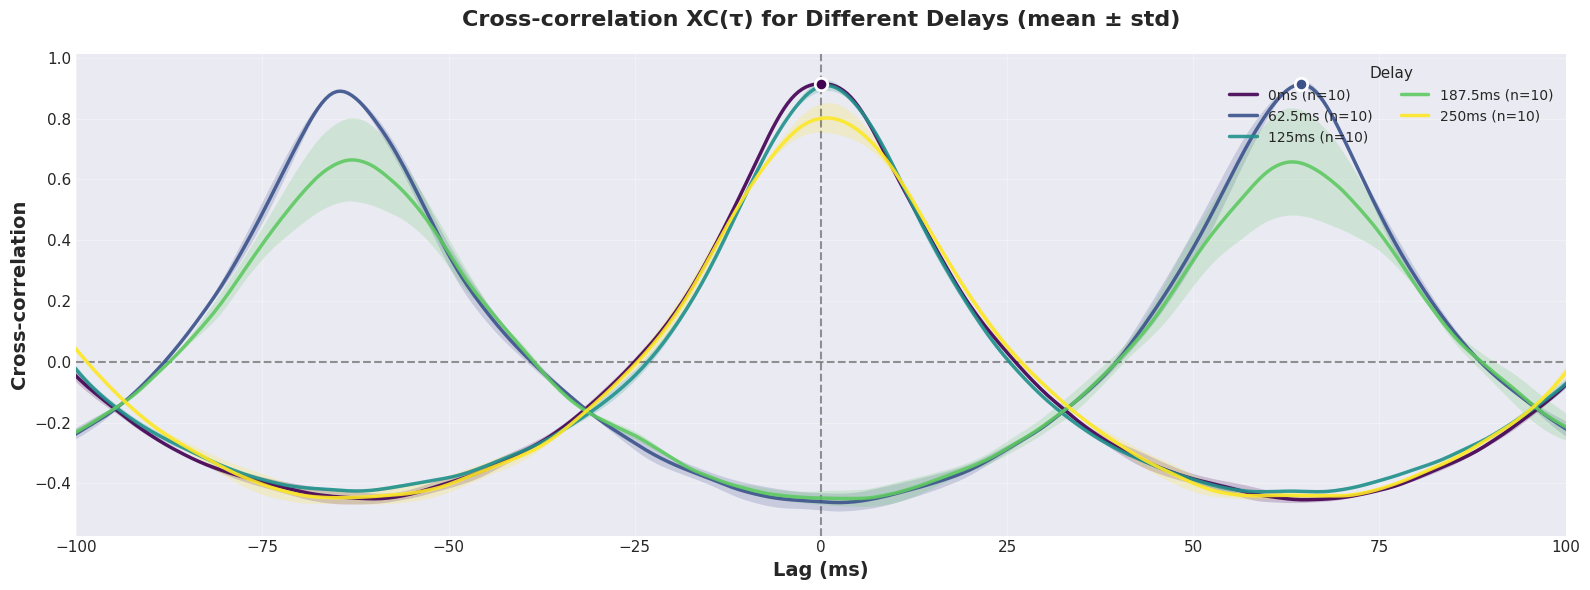

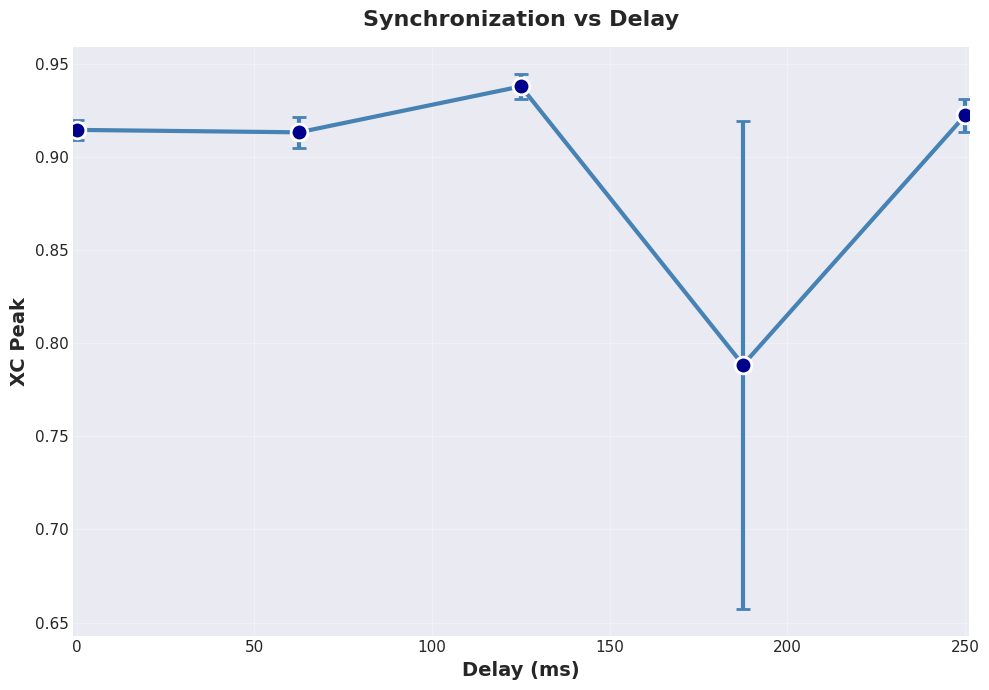

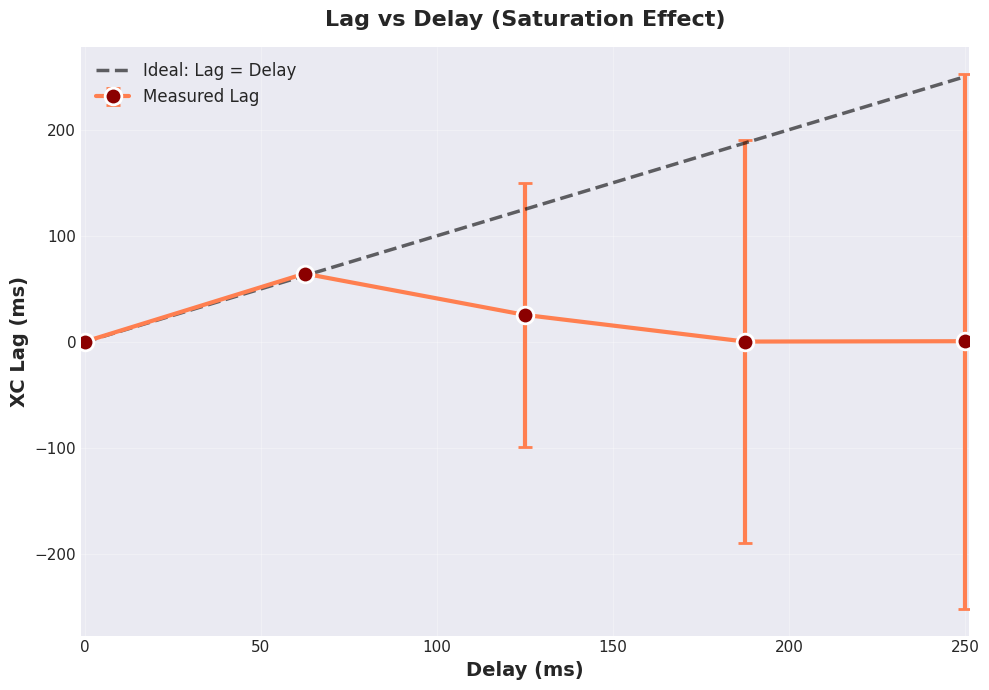

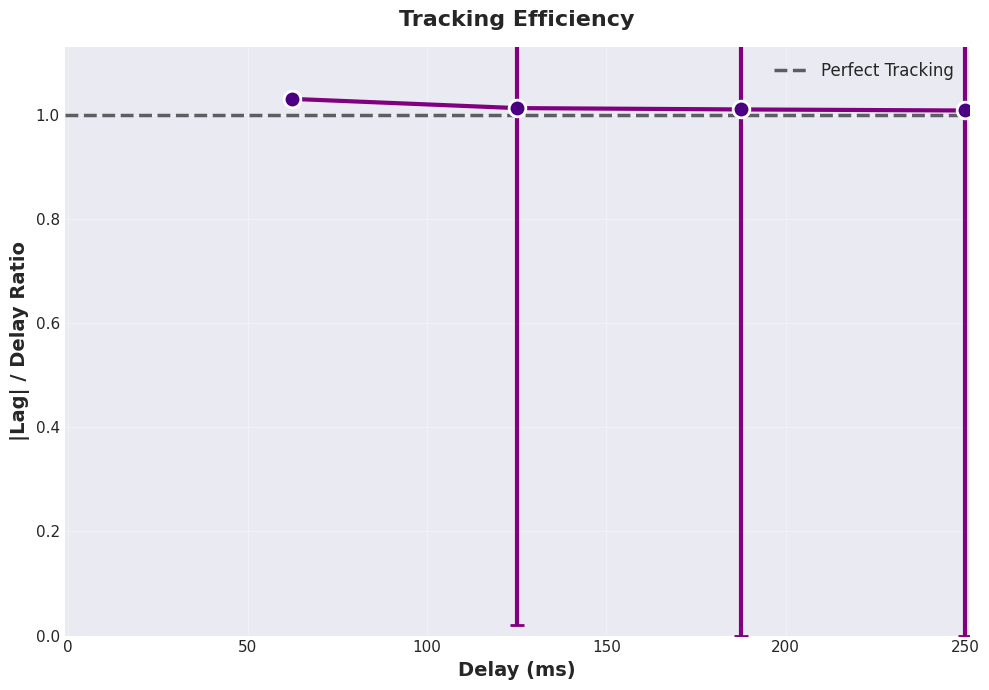

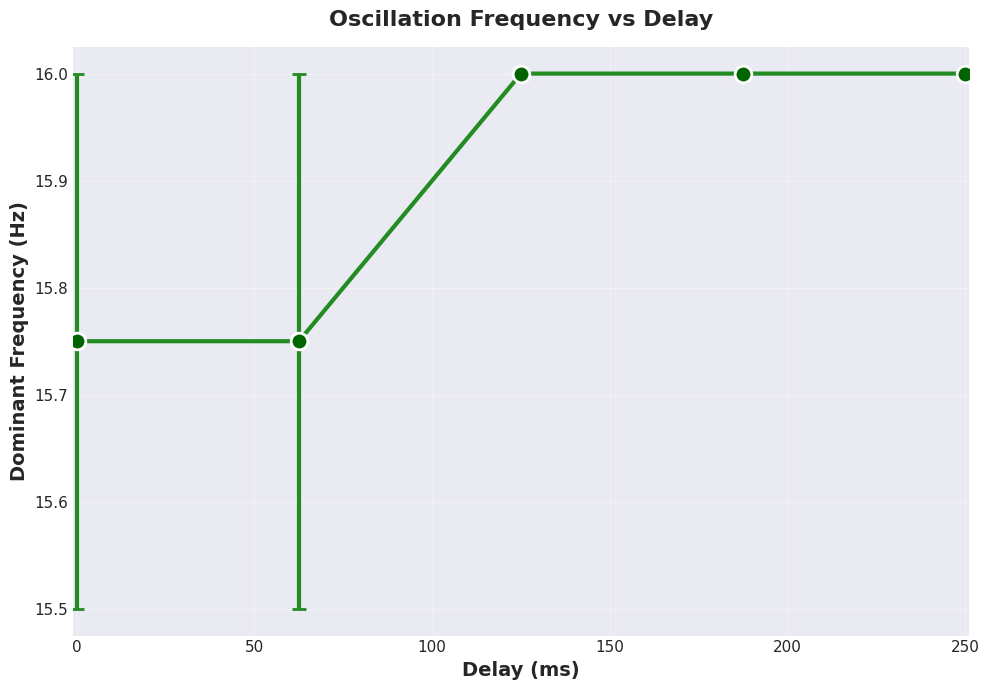

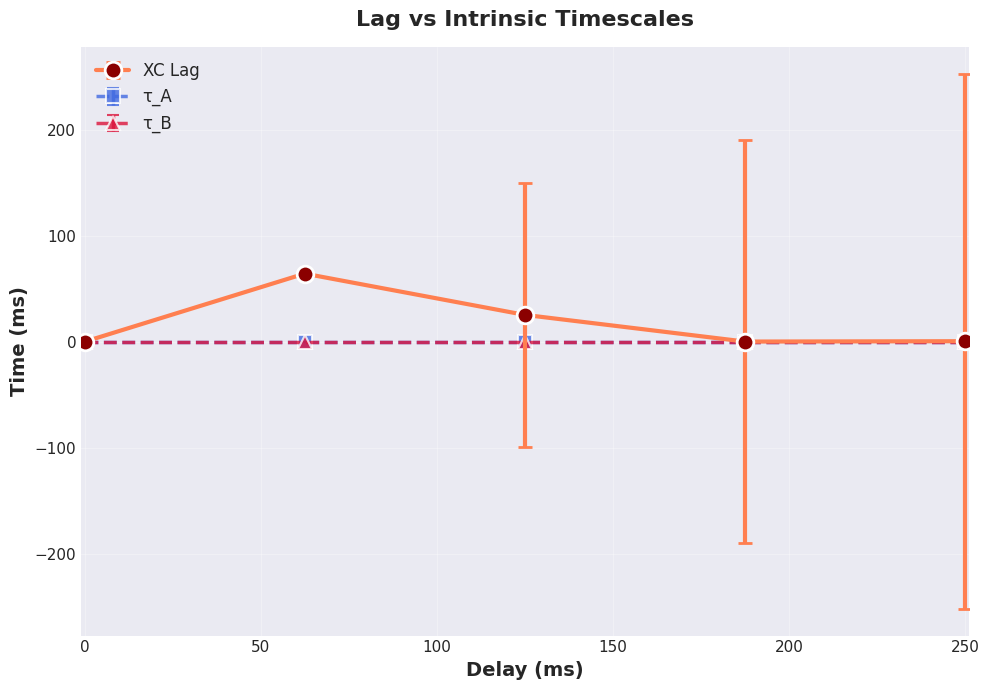

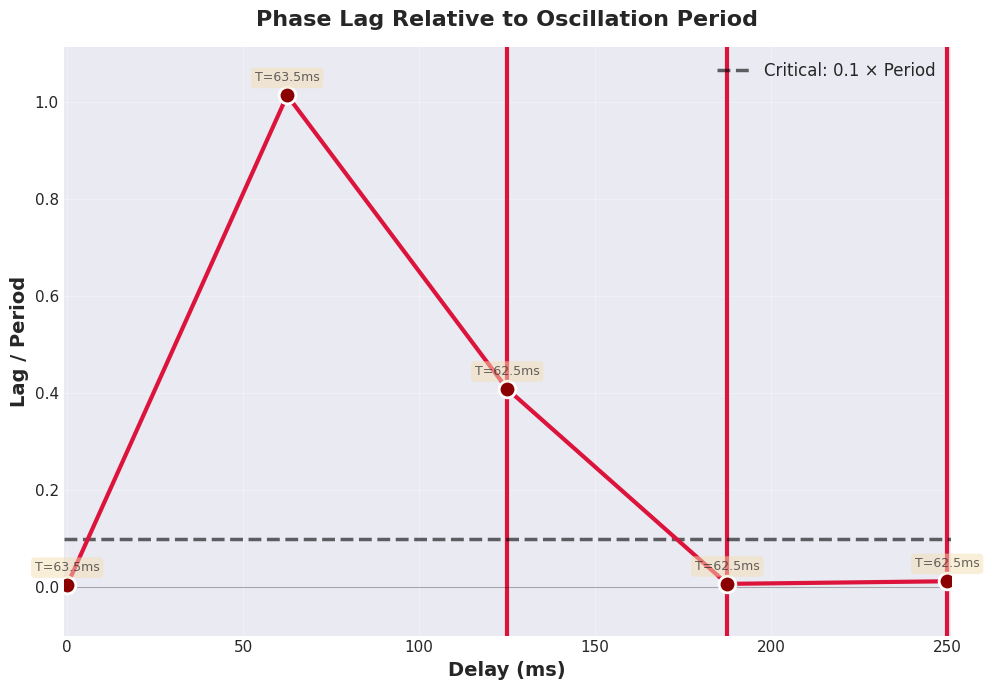

In [4]:
# =============================================================================
# ANÁLISIS Y VISUALIZACIÓN EXTENDIDA
# =============================================================================

if len(all_results) == 0:
    logger.error("No successful simulations!")
    sys.exit(1)

# Tabla resumen
logger.info("\nEXTENDED RESULTS:")
logger.info(f"{'Delay':<8} {'XC Peak':<10} {'XC Lag':<10} {'Lag/Delay':<12} "
           f"{'Freq (Hz)':<10} {'Period':<10} {'Lag/Period':<12} {'τ_A':<8} {'τ_B':<8}")
logger.info("-" * 100)

for res in all_results:
    logger.info(
        f"{res['delay_ms']:<8} "
        f"{res['xc_peak']:<10.3f} "
        f"{res['xc_lag_ms']:<10.1f} "
        f"{res['lag_delay_ratio']:<12.2f} "
        f"{res['dominant_freq']:<10.1f} "
        f"{res['period_ms']:<10.1f} "
        f"{res['lag_period_ratio']:<12.3f} "
        f"{res['tau_A_ms']:<8.1f} "
        f"{res['tau_B_ms']:<8.1f}"
    )

# =============================================================================
# PREPARACIÓN: Agregar resultados por delay (media ± std)
# =============================================================================

def aggregate_by_delay(all_results, delay_values):
    aggregated = {}
    for delay in delay_values:
        trials = [r for r in all_results if r['delay_ms'] == delay]
        if not trials:
            continue
        
        xc_stack = np.array([t['xc_full'] for t in trials])
        lags = np.array(trials[0]['lags_full'])
        
        aggregated[delay] = {
            'n_trials': len(trials),
            'lags': lags,
            'xc_mean': xc_stack.mean(axis=0),
            'xc_std': xc_stack.std(axis=0),
            'xc_peak_mean': np.mean([t['xc_peak'] for t in trials]),
            'xc_peak_std': np.std([t['xc_peak'] for t in trials]),
            'xc_lag_mean': np.mean([t['xc_lag_ms'] for t in trials]),
            'xc_lag_std': np.std([t['xc_lag_ms'] for t in trials]),
            'plv_alpha_mean': np.mean([t['plv_alpha'] for t in trials]),
            'plv_alpha_std': np.std([t['plv_alpha'] for t in trials]),
            'lag_delay_ratio_mean': np.mean([abs(t['lag_delay_ratio']) for t in trials if not np.isnan(t['lag_delay_ratio'])]),
            'lag_delay_ratio_std': np.std([t['lag_delay_ratio'] for t in trials if not np.isnan(t['lag_delay_ratio'])]),
            'freq_mean': np.mean([t['dominant_freq'] for t in trials]),
            'freq_std': np.std([t['dominant_freq'] for t in trials]),
            'period_mean': np.mean([t['period_ms'] for t in trials]),
            'period_std': np.std([t['period_ms'] for t in trials]),
            'lag_period_ratio_mean': np.mean([t['lag_period_ratio'] for t in trials]),
            'lag_period_ratio_std': np.std([t['lag_period_ratio'] for t in trials]),
            'tau_A_mean': np.mean([t['tau_A_ms'] for t in trials]),
            'tau_A_std': np.std([t['tau_A_ms'] for t in trials]),
            'tau_B_mean': np.mean([t['tau_B_ms'] for t in trials]),
            'tau_B_std': np.std([t['tau_B_ms'] for t in trials]),
        }
    return aggregated

agg_data = aggregate_by_delay(all_results, DELAY_VALUES)

# =============================================================================
# PLOTS INDIVIDUALES (GRANDES Y CLAROS)
# =============================================================================

output_dir = Path("./results/experiments/symmetric_delay_sweep")
output_dir.mkdir(parents=True, exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plots_dir = output_dir / f"plots_{timestamp}"
plots_dir.mkdir(exist_ok=True)

# Configuración estética común
plt.style.use('seaborn-v0_8-darkgrid')
COLORS = plt.cm.viridis(np.linspace(0, 1, len(DELAY_VALUES)))

# 1. CURVAS XC COMPLETAS CON BANDAS ±1 STD
fig, ax = plt.subplots(figsize=(16, 6))

for i, delay in enumerate(sorted(agg_data.keys())):
    data = agg_data[delay]
    lags = data['lags']
    xc_mean = data['xc_mean']
    xc_std = data['xc_std']
    
    color = COLORS[i]
    
    # Línea principal
    ax.plot(lags, xc_mean, linewidth=2.5, label=f"{delay}ms (n={data['n_trials']})", 
            color=color, alpha=0.9, zorder=5)
    
    # Banda ±1 std
    ax.fill_between(lags, xc_mean - xc_std, xc_mean + xc_std, 
                     color=color, alpha=0.2, edgecolor='none', zorder=1)
    
    # Peak
    peak_idx = np.argmax(np.abs(xc_mean))
    ax.scatter(lags[peak_idx], xc_mean[peak_idx], s=80, 
               color=color, edgecolor='white', linewidth=2, zorder=10,
               marker='o')

ax.set_xlim(-100, 100)  # Zoom en región relevante
ax.axhline(0, color='black', linestyle='--', alpha=0.4, linewidth=1.5)
ax.axvline(0, color='black', linestyle='--', alpha=0.4, linewidth=1.5)
ax.set_xlabel('Lag (ms)', fontsize=14, fontweight='bold')
ax.set_ylabel('Cross-correlation', fontsize=14, fontweight='bold')
ax.set_title('Cross-correlation XC(τ) for Different Delays (mean ± std)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', framealpha=0.95, fontsize=10, 
         title='Delay', title_fontsize=11, ncol=2)
ax.grid(True, alpha=0.3, linewidth=0.8)
ax.tick_params(labelsize=11)
plt.tight_layout()
fig.savefig(plots_dir / "1_xc_curves.png", dpi=300, bbox_inches='tight')


# 2. XC PEAK vs DELAY (con errorbars)
fig, ax = plt.subplots(figsize=(10, 7))

delays_plot = sorted(agg_data.keys())
peaks_mean = [agg_data[d]['xc_peak_mean'] for d in delays_plot]
peaks_std = [agg_data[d]['xc_peak_std'] for d in delays_plot]

ax.errorbar(delays_plot, peaks_mean, yerr=peaks_std, fmt='o-', 
            linewidth=3, markersize=12, capsize=5, capthick=2,
            color='steelblue', markerfacecolor='darkblue', 
            markeredgecolor='white', markeredgewidth=2, ecolor='steelblue')

ax.set_xlim(-1, max(delays_plot) + 1)
ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
ax.set_ylabel('XC Peak', fontsize=14, fontweight='bold')
ax.set_title('Synchronization vs Delay', fontsize=16, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, linewidth=0.8)
ax.tick_params(labelsize=11)
plt.tight_layout()
fig.savefig(plots_dir / "2_xc_peak_vs_delay.png", dpi=300, bbox_inches='tight')


# 3. LAG vs DELAY (con errorbars)
fig, ax = plt.subplots(figsize=(10, 7))

lags_mean = [agg_data[d]['xc_lag_mean'] for d in delays_plot]
lags_std = [agg_data[d]['xc_lag_std'] for d in delays_plot]

ax.errorbar(delays_plot, lags_mean, yerr=lags_std, fmt='o-', 
            linewidth=3, markersize=12, capsize=5, capthick=2,
            color='coral', markerfacecolor='darkred',
            markeredgecolor='white', markeredgewidth=2, 
            ecolor='coral', label='Measured Lag')

ax.plot(delays_plot, delays_plot, 'k--', alpha=0.6, linewidth=2.5, 
       label='Ideal: Lag = Delay')

ax.set_xlim(-1, max(delays_plot) + 1)
ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
ax.set_ylabel('XC Lag (ms)', fontsize=14, fontweight='bold')
ax.set_title('Lag vs Delay (Saturation Effect)', fontsize=16, fontweight='bold', pad=15)
ax.legend(fontsize=12, framealpha=0.95)
ax.grid(True, alpha=0.3, linewidth=0.8)
ax.tick_params(labelsize=11)
plt.tight_layout()
fig.savefig(plots_dir / "3_lag_vs_delay.png", dpi=300, bbox_inches='tight')


# 4. LAG/DELAY RATIO (con errorbars, valor absoluto)
fig, ax = plt.subplots(figsize=(10, 7))

# Filtrar delays > 0 para el ratio
delays_nonzero = [d for d in delays_plot if d > 0]
ratios_mean = [agg_data[d]['lag_delay_ratio_mean'] for d in delays_nonzero]
ratios_std = [agg_data[d]['lag_delay_ratio_std'] for d in delays_nonzero]

ax.errorbar(delays_nonzero, ratios_mean, yerr=ratios_std, fmt='o-', 
            linewidth=3, markersize=12, capsize=5, capthick=2,
            color='purple', markerfacecolor='indigo',
            markeredgecolor='white', markeredgewidth=2, ecolor='purple')

ax.axhline(1.0, color='black', linestyle='--', alpha=0.6, 
          linewidth=2.5, label='Perfect Tracking')

ax.set_xlim(-1, max(delays_plot) + 1)
ax.set_ylim(0, max(1.1, max(ratios_mean) + 0.1))
ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
ax.set_ylabel('|Lag| / Delay Ratio', fontsize=14, fontweight='bold')
ax.set_title('Tracking Efficiency', fontsize=16, fontweight='bold', pad=15)
ax.legend(fontsize=12, framealpha=0.95)
ax.grid(True, alpha=0.3, linewidth=0.8)
ax.tick_params(labelsize=11)
plt.tight_layout()
fig.savefig(plots_dir / "4_tracking_efficiency.png", dpi=300, bbox_inches='tight')


# 5. FRECUENCIA vs DELAY (con errorbars)
fig, ax = plt.subplots(figsize=(10, 7))

freqs_mean = [agg_data[d]['freq_mean'] for d in delays_plot]
freqs_std = [agg_data[d]['freq_std'] for d in delays_plot]

ax.errorbar(delays_plot, freqs_mean, yerr=freqs_std, fmt='o-', 
            linewidth=3, markersize=12, capsize=5, capthick=2,
            color='forestgreen', markerfacecolor='darkgreen',
            markeredgecolor='white', markeredgewidth=2, ecolor='forestgreen')

ax.set_xlim(-1, max(delays_plot) + 1)
ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
ax.set_ylabel('Dominant Frequency (Hz)', fontsize=14, fontweight='bold')
ax.set_title('Oscillation Frequency vs Delay', fontsize=16, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, linewidth=0.8)
ax.tick_params(labelsize=11)
plt.tight_layout()
fig.savefig(plots_dir / "5_frequency_vs_delay.png", dpi=300, bbox_inches='tight')


# 6. LAG vs TIMESCALES (con errorbars)
fig, ax = plt.subplots(figsize=(10, 7))

tau_A_mean = [agg_data[d]['tau_A_mean'] for d in delays_plot]
tau_A_std = [agg_data[d]['tau_A_std'] for d in delays_plot]
tau_B_mean = [agg_data[d]['tau_B_mean'] for d in delays_plot]
tau_B_std = [agg_data[d]['tau_B_std'] for d in delays_plot]

# XC Lag
ax.errorbar(delays_plot, lags_mean, yerr=lags_std, fmt='o-', 
            linewidth=3, markersize=12, capsize=5, capthick=2,
            label='XC Lag', color='coral', markerfacecolor='darkred',
            markeredgecolor='white', markeredgewidth=2, ecolor='coral', zorder=3)

# Timescales
ax.errorbar(delays_plot, tau_A_mean, yerr=tau_A_std, fmt='s--', 
            linewidth=2.5, markersize=10, capsize=4, capthick=1.5,
            label='τ_A', color='royalblue', alpha=0.8,
            markeredgecolor='white', markeredgewidth=1.5, ecolor='royalblue', zorder=2)

ax.errorbar(delays_plot, tau_B_mean, yerr=tau_B_std, fmt='^--', 
            linewidth=2.5, markersize=10, capsize=4, capthick=1.5,
            label='τ_B', color='crimson', alpha=0.8,
            markeredgecolor='white', markeredgewidth=1.5, ecolor='crimson', zorder=2)

ax.set_xlim(-1, max(delays_plot) + 1)
ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
ax.set_ylabel('Time (ms)', fontsize=14, fontweight='bold')
ax.set_title('Lag vs Intrinsic Timescales', fontsize=16, fontweight='bold', pad=15)
ax.legend(fontsize=12, framealpha=0.95, loc='upper left')
ax.grid(True, alpha=0.3, linewidth=0.8)
ax.tick_params(labelsize=11)
plt.tight_layout()
fig.savefig(plots_dir / "6_lag_vs_timescales.png", dpi=300, bbox_inches='tight')


# 7. LAG/PERIOD RATIO (con anotaciones de periodo)
fig, ax = plt.subplots(figsize=(10, 7))

lag_period_mean = [agg_data[d]['lag_period_ratio_mean'] for d in delays_plot]
lag_period_std = [agg_data[d]['lag_period_ratio_std'] for d in delays_plot]
periods_mean = [agg_data[d]['period_mean'] for d in delays_plot]

ax.errorbar(delays_plot, lag_period_mean, yerr=lag_period_std, fmt='o-', 
            linewidth=3, markersize=12, capsize=5, capthick=2,
            color='crimson', markerfacecolor='darkred',
            markeredgecolor='white', markeredgewidth=2, ecolor='crimson')

# Anotar periodos
for delay, ratio, period in zip(delays_plot, lag_period_mean, periods_mean):
    ax.annotate(f'T={period:.1f}ms', 
                xy=(delay, ratio),
                xytext=(0, 10), textcoords='offset points', 
                fontsize=9, ha='center', alpha=0.7,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='wheat', alpha=0.5, edgecolor='none'))

ax.axhline(0.1, color='black', linestyle='--', alpha=0.6, 
          linewidth=2.5, label='Critical: 0.1 × Period')
ax.axhline(0, color='k', linestyle='-', linewidth=0.8, alpha=0.3)

ax.set_xlim(-1, max(delays_plot) + 1)
ax.set_ylim(-0.1, max(lag_period_mean) + 0.1)
ax.set_xlabel('Delay (ms)', fontsize=14, fontweight='bold')
ax.set_ylabel('Lag / Period', fontsize=14, fontweight='bold')
ax.set_title('Phase Lag Relative to Oscillation Period', fontsize=16, fontweight='bold', pad=15)
ax.legend(fontsize=12, framealpha=0.95)
ax.grid(True, alpha=0.3, linewidth=0.8)
ax.tick_params(labelsize=11)
plt.tight_layout()
fig.savefig(plots_dir / "7_phase_relation.png", dpi=300, bbox_inches='tight')

logger.info(f"\n7 individual plots saved in: {plots_dir}")
logger.info(f"  1. XC curves with ±1 std bands (16×6)")
logger.info(f"  2-7. Analysis plots with errorbars (10×7 each)")


# Guardar resultados JSON (incluir agregados)
results_dict = {
    'config': {
        'delay_values': DELAY_VALUES,
        'n_trials': SIM_CONFIG['n_trials'],
        'population': POPULATION_PARAMS,
        'connection': CONNECTION_PARAMS,
        'simulation': SIM_CONFIG
    },
    'all_trials': all_results,
    'aggregated': {int(k): {key: (val.tolist() if isinstance(val, np.ndarray) else val) 
                            for key, val in v.items()} 
                   for k, v in agg_data.items()}
}

results_path = output_dir / f"extended_results_{timestamp}.json"
with open(results_path, 'w') as f:
    json.dump(results_dict, f, indent=2, default=lambda x: float(x) if isinstance(x, np.number) else x)

logger.info(f"Results saved: {results_path}")
logger.info(f"\n{'='*60}")
logger.info("ANALYSIS COMPLETE")
logger.info(f"{'='*60}")

plt.show()